In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("data/hdf_journalier.csv")

## Approche statistique avec statmodels

### Pourquoi la stationnarité est-elle importante ?

- La stationnarité d'une série temporelle est une propriété importante car elle simplifie le processus de modélisation. Une série temporelle stationnaire a des propriétés statistiques (moyenne, variance, autocorrélation, etc.) qui ne changent pas au fil du temps. Cela rend la série plus prévisible et plus facile à modéliser. Les modèles ARIMA et SARIMA sont conçus pour travailler avec des séries temporelles stationnaires ou pour les rendre stationnaires.


### Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?

Un modèle AR (AutoRégressif) est un modèle qui utilise les valeurs passées de la série pour prédire les valeurs futures. Le paramètre pp dans un modèle AR(p) indique le nombre de "lags" (retards) de la série qui sont utilisés comme variables explicatives. Par exemple, un modèle AR(1) utiliserait la valeur à t−1t−1 pour prédire la valeur à tt, tandis qu'un modèle AR(2) utiliserait les valeurs à t−1t−1 et t−2t−2.


### Qu’est qu’un modèle MA, à quoi correspond le paramètre q ?

- Un modèle MA (Moyenne Mobile) est un modèle qui utilise les erreurs passées pour prédire les valeurs futures. Le paramètre qq dans un modèle MA(q) indique le nombre d'erreurs passées à considérer. Par exemple, un modèle MA(1) prendrait en compte l'erreur à t−1t−1 pour faire une prédiction à tt.

### Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?

- Un modèle ARIMA combine les éléments des modèles AR et MA et ajoute un terme d'intégration. Le paramètre dd représente l'ordre de différenciation nécessaire pour rendre la série temporelle stationnaire. Une série temporelle différenciée dd fois est une série où chaque valeur est remplacée par la différence entre elle-même et la valeur précédente, dd fois.

### Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?

- Le modèle SARIMA ajoute une composante saisonnière aux modèles ARIMA. Le paramètre ss indique la périodicité de la saisonnalité. Par exemple, pour des données mensuelles avec une saisonnalité annuelle, ss serait de 12.

### Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.

- Déterminer d’abord s et appliquer la désaisonnalisation
-  Sur la série désaisonnalisée recherchez d et détrendez
-  Sur la série détrendée, recherchez q et p

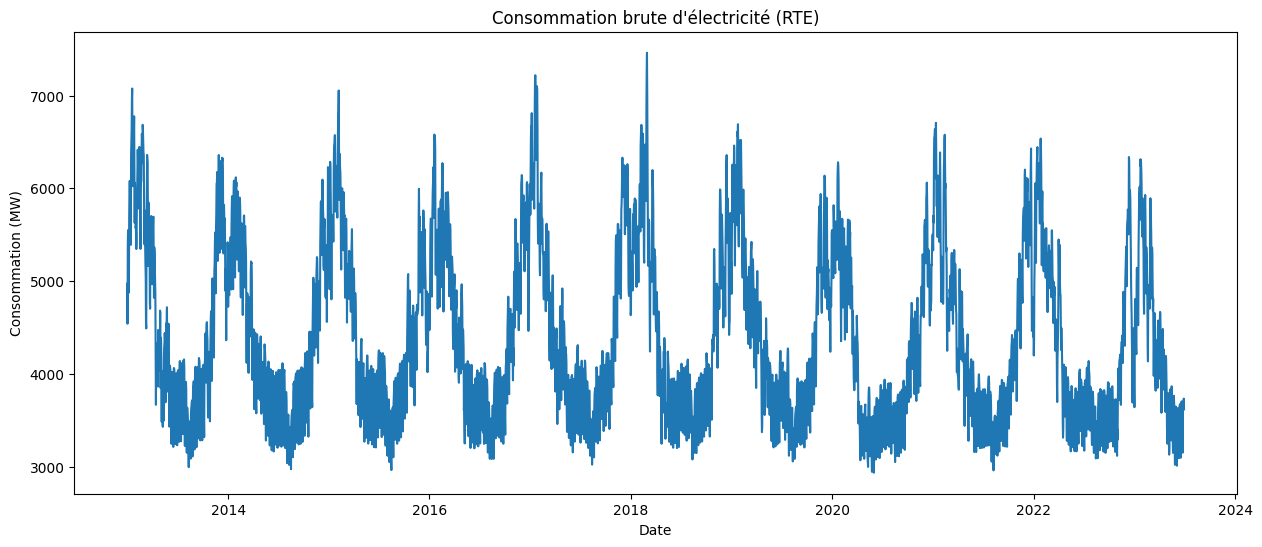

In [3]:
df['date_heure'] = pd.to_datetime(df['date_heure'])

df.set_index('date_heure', inplace=True)


plt.figure(figsize=(15, 6))
plt.plot(df.index, df['consommation_brute_electricite_rte'])
plt.title('Consommation brute d\'électricité (RTE)')
plt.xlabel('Date')
plt.ylabel('Consommation (MW)')
plt.show()

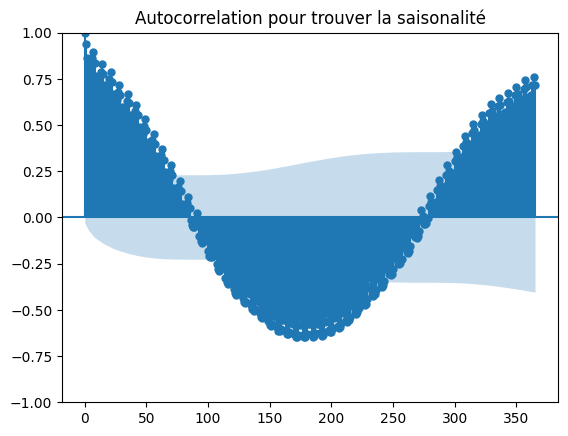

In [11]:

plot_acf(df['consommation_brute_electricite_rte'], lags=365)
plt.title('Autocorrelation pour trouver la saisonalité')
plt.show()

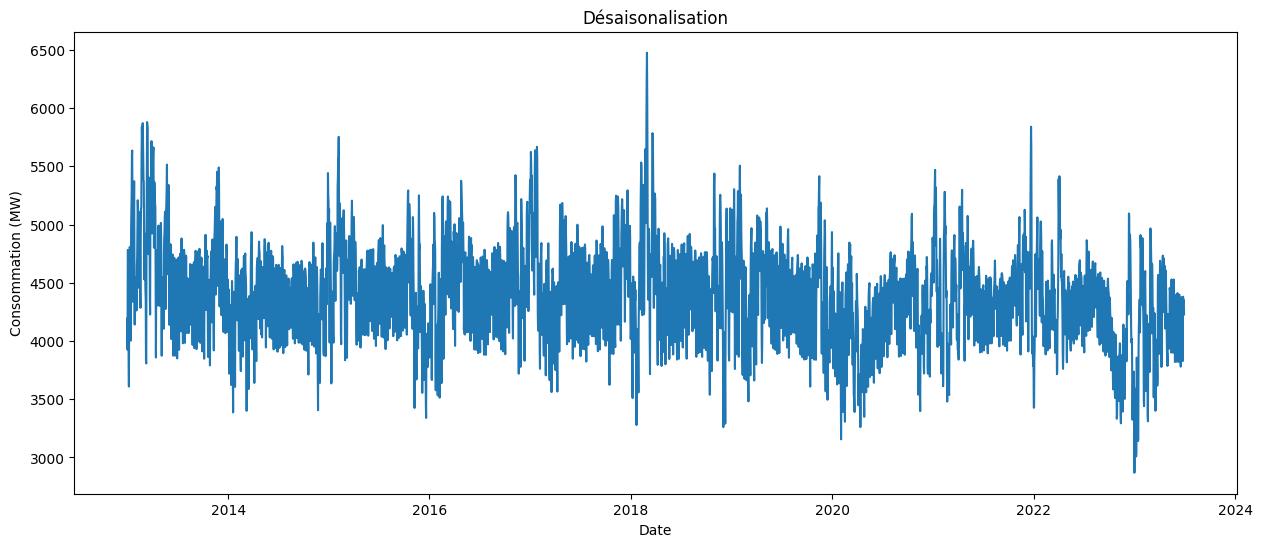

In [12]:
decomposition = seasonal_decompose(df['consommation_brute_electricite_rte'], period=365)

seasonal_component = decomposition.seasonal
# Remove the seasonal component to get the deseasonalized time series
deseasonalized_series = df['consommation_brute_electricite_rte'] - seasonal_component

plt.figure(figsize=(15, 6))
plt.plot(deseasonalized_series.index, deseasonalized_series)
plt.title('Désaisonalisation')
plt.xlabel('Date')
plt.ylabel('Consommation (MW)')
plt.show()

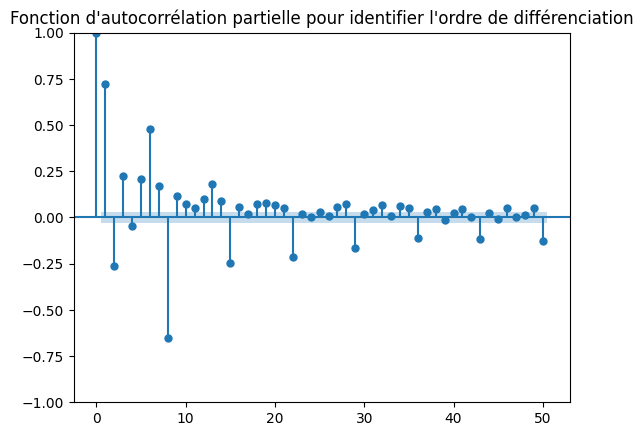

In [13]:
plot_pacf(deseasonalized_series.dropna(), lags=50)

plt.title("autocorrélation partielle pour identifier d")

plt.show()

d = 1

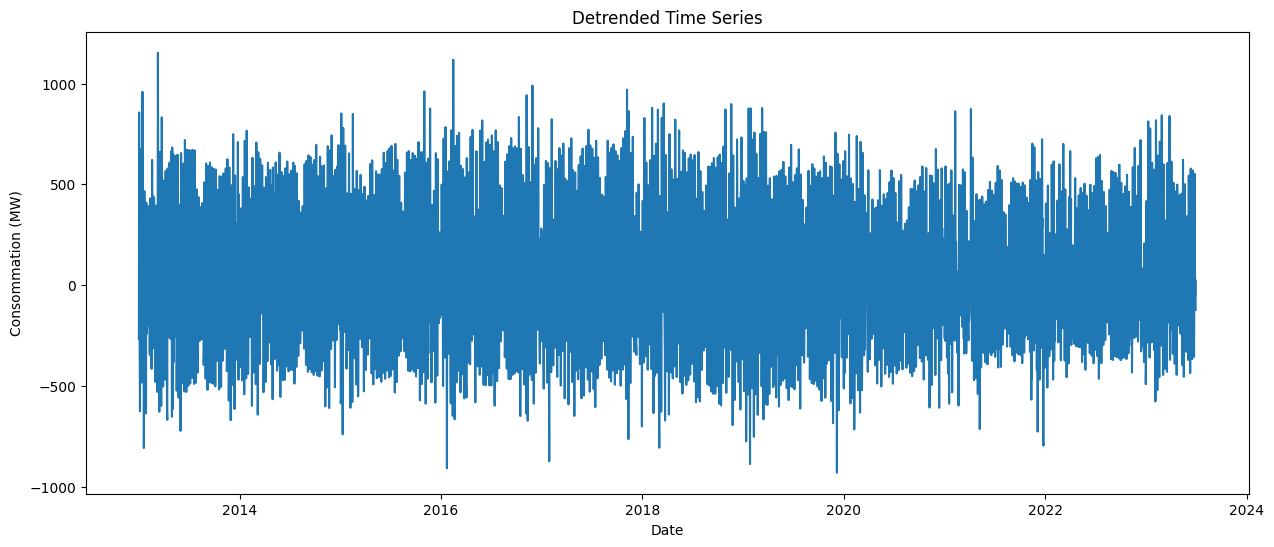

In [9]:
deseasonalized_diff_series = deseasonalized_series.diff().dropna()

plt.figure(figsize=(15, 6))
plt.plot(deseasonalized_diff_series.index, deseasonalized_diff_series)
plt.title('Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Consommation (MW)')
plt.show()

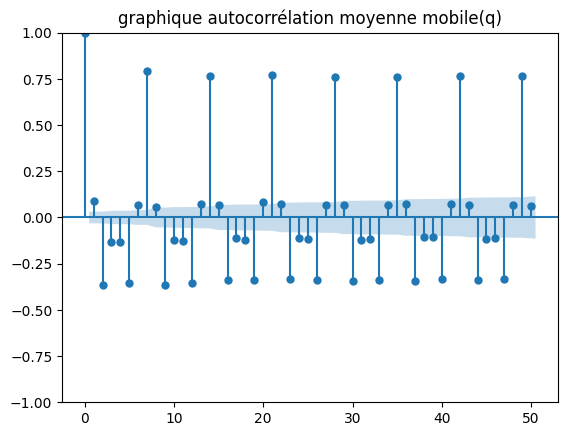

q = 2 ou 3 


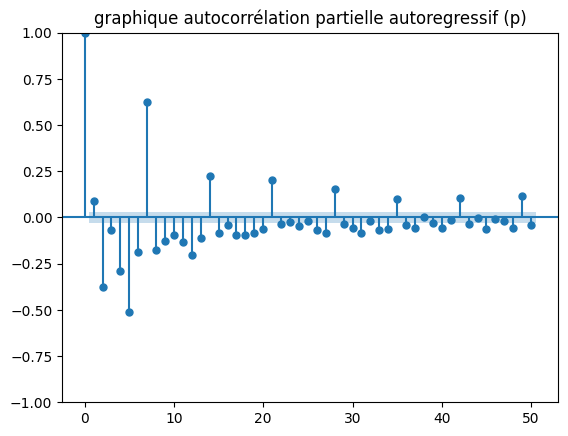

le graphique ne donne pas une indication claire d'un ordre pp 


In [19]:
plot_acf(deseasonalized_diff_series.dropna(), lags=50)
plt.title("graphique autocorrélation moyenne mobile(q)")
plt.show()
print("q = 2 ou 3 ")


plot_pacf(deseasonalized_diff_series.dropna(), lags=50)
plt.title("graphique autocorrélation partielle autoregressif (p)")
plt.show()
print("le graphique ne donne pas une indication claire d'un ordre p")



### A l’aide statmodels et dans une approche statistique (sans train/test/split), lancez un modèle ARIMA sur la série désaisonnalisée. 
- Est ce que tous les paramètres sont significatifs
- Qu’est ce que l’AIC?
- Essayez d’améliorer votre modèle en modifiant les paramètres non significatifs et en vous basant sur le critère de l’AIC.

In [25]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(deseasonalized_series, order=(3, 1, 2))
arima_results = arima_model.fit()

arima_results.summary()



/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3834
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -26786.061
Date:                Mon, 18 Sep 2023   AIC                          53584.122
Time:                        11:53:49   BIC                          53621.631
Sample:                    12-31-2012   HQIC                         53597.447
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0032      0.029     -0.112      0.910      -0.060       0.053
ar.L2          0.2196      0.024      9.186      0.000       0.173       0.266
ar.L3         -0.1953      0.023     -8.478      0.000      -0.240      -0.150
ma.L1         -0.0188      0.021     -0.914      0.361      -0.059       0.022
ma.L2         -0.7994      0.017    -47.721      0.000      -0.832      -0.767
sigma2      6.869e+04   1581.902     43.422      0.000    6.56e+04    7.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.88   Prob(JB):                         0.96
Heteroskedasticity (H):               0.77   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Significativité des paramètres**

- Les coefficients AR (ar.L1, ar.L2, ar.L3) et MA (ma.L1, ma.L2, ma.L3) ont tous des valeurs de pp très faibles (P>|z| proche de 0), ce qui indique qu'ils sont statistiquement significatifs.

**AIC (Critère d'Information d'Akaike)**

- L'AIC (Akaike Information Criterion) est une mesure de la qualité d'ajustement d'un modèle statistique. Il prend en compte à la fois la complexité du modèle et la qualité de l'ajustement. Dans notre cas, l'AIC est de 52834.589.
- Un modèle avec un AIC plus faible est généralement considéré comme un meilleur modèle (en termes de qualité d'ajustement et de simplicité).

In [27]:
best_arima_model = ARIMA(deseasonalized_series, order=(3, 1, 3))
best_arima_results = best_arima_model.fit()
residuals = best_arima_results.resid


/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


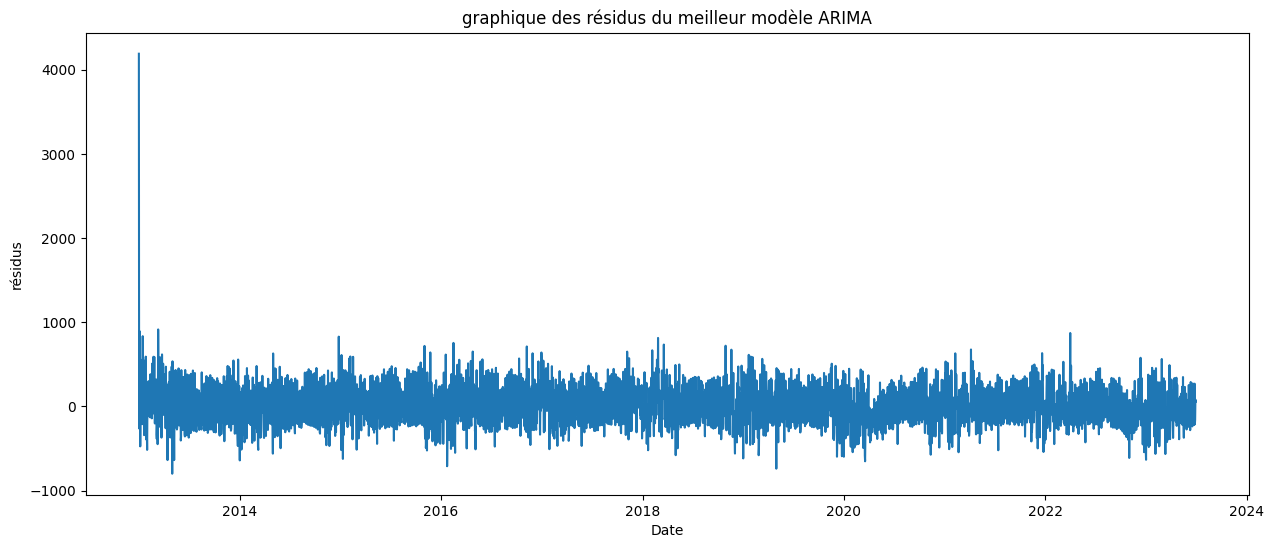

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('graphique des résidus du meilleur modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('résidus')
plt.show()

- Le graphique des résidus montre une  volatilité, mais il ne semble pas y avoir de tendance ou de saisonnalité évidente.

### Affichez les prédictions du meilleur de vos modèles. Qu’en pensez vous?

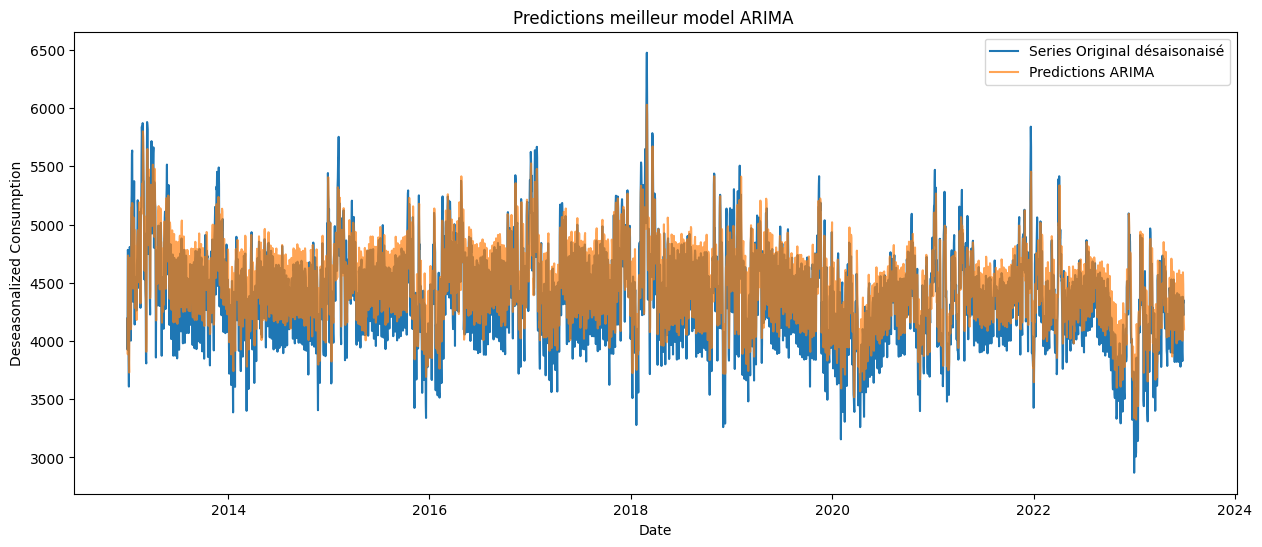

In [31]:
predictions = best_arima_results.predict(start=1, end=len(deseasonalized_series))



plt.figure(figsize=(15, 6))
plt.plot(deseasonalized_series, label='Series Original désaisonaisé')
plt.plot(predictions, label='Predictions ARIMA ', alpha=0.7)
plt.title('Predictions meilleur model ARIMA ')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Consumption')
plt.legend()
plt.show()

Proximité des courbes : On peut observer que les prédictions semblent suivre de près la série originale, ce qui indique que le modèle a réussi à capturer une grande partie de la dynamique de la série.

Volatilité : La volatilité (fluctuations) semble également bien capturée par le modèle.

Pas de décalage visible : Il n'y a pas de décalage significatif entre les prédictions et les valeurs réelles, ce qui serait un signe de mauvais ajustement.

En somme, à première vue, le modèle semble avoir fait un bon travail pour ajuster et prédire la série désaisonnalisée. Cependant, des analyses plus formelles comme les tests de performance prédictive pourraient être utiles pour une évaluation plus complète.

Entrainez le même modèle mais cette fois uniquement sur les dates de 2014 à 2020. Affichez les prédictions sur 2021-2022 et comparez aux valeurs réelles. Comment comprenez-vous la différence entre les deux graphiques?

/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


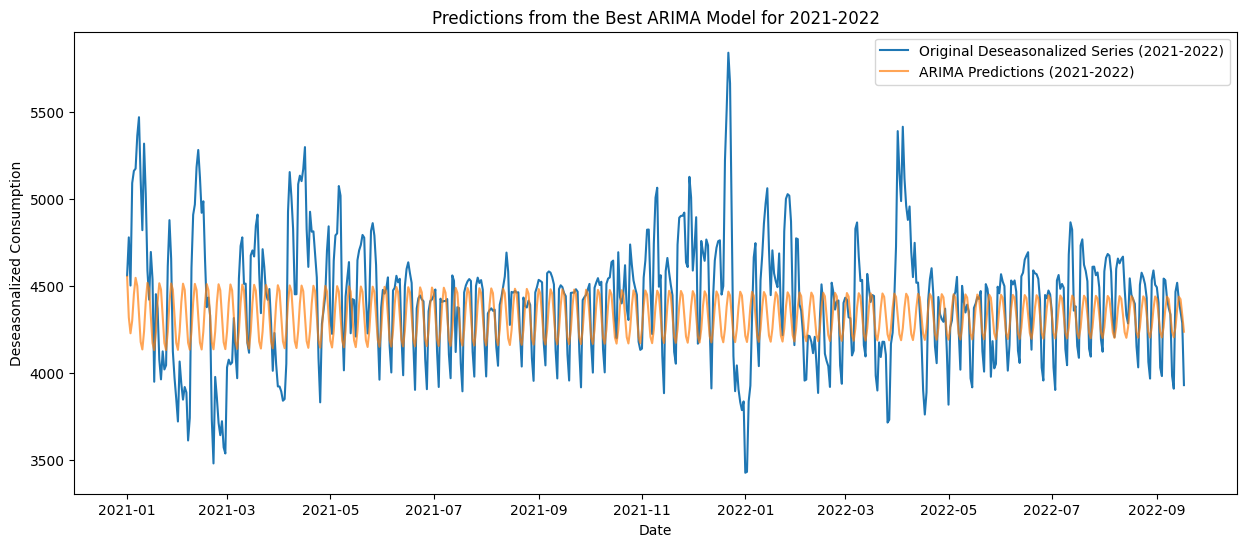

In [32]:
deseasonalized_series.index = deseasonalized_series.index.tz_localize(None)

# 2014-2020
deseasonalized_series_2014_2020 = deseasonalized_series['2014-01-01':'2020-12-31']

best_arima_model_2014_2020 = ARIMA(deseasonalized_series_2014_2020, order=(3, 1, 3))
best_arima_results_2014_2020 = best_arima_model_2014_2020.fit()

# 2021-2022
predictions_2021_2022 = best_arima_results_2014_2020.predict(start='2021-01-01', end='2022-09-17')

plt.figure(figsize=(15, 6))
plt.plot(deseasonalized_series['2021-01-01':'2022-09-17'], label='Original Deseasonalized Series (2021-2022)')
plt.plot(predictions_2021_2022, label='ARIMA Predictions (2021-2022)', alpha=0.7)
plt.title('Predictions from the Best ARIMA Model for 2021-2022')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Consumption')
plt.legend()
plt.show()

- Écart entre les prédictions et les valeurs réelles: On peut observer que les prédictions et les valeurs réelles ne coïncident pas aussi étroitement que dans le premier graphique. Cela pourrait s'expliquer par le fait que le modèle a été formé sur un ensemble de données plus ancien et pourrait ne pas avoir capturé certaines dynamiques plus récentes.

- Fluctuations plus prononcées dans les prédictions: Les prédictions semblent présenter des fluctuations plus prononcées par rapport aux valeurs réelles. Cela pourrait être dû à des événements non capturés par le modèle, notamment parce qu'il a été formé sur des données antérieures à 2021.

- Manque de données récentes dans l'entraînement: Comme le modèle a été formé uniquement jusqu'à 2020, il n'a pas eu l'occasion de "voir" des événements ou des changements qui pourraient avoir eu lieu en 2021 ou 2022, ce qui pourrait expliquer certaines des différences.

En résumé, le modèle semble moins performant lorsqu'il est appliqué à des données en dehors de la période sur laquelle il a été entraîné. Cela souligne l'importance de disposer de données d'entraînement à jour pour améliorer la précision des prédictions.

### A l’aide de statmodels et pmdarima, lancez un auto ARIMA sur la série désaisonnalisée.
- Comparez ce modèle avec le modèle précédent graphiquement puis en utilisant l’AIC

In [33]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(deseasonalized_series, start_p=0, start_q=0,
                              test='adf',       # use adftest to find optimal 'd'
                              max_p=5, max_q=5, # maximum p and q
                              m=1,              # frequency of series
                              d=None,           # let model determine 'd'
                              seasonal=False,   # No seasonality
                              start_P=0, 
                              D=0, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75329.332, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=54776.840, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=54494.009, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=53780.811, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=54197.348, Time=2.50 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=53692.599, Time=1.73 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=53784.695, Time=1.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=53627.231, Time=2.32 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=53696.856, Time=1.74 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3834
Model:               SARIMAX(4, 0, 5)   Log Likelihood              -26132.606
Date:                Mon, 18 Sep 2023   AIC                          52287.213
Time:                        12:19:55   BIC                          52355.981
Sample:                    12-31-2012   HQIC                         52311.642
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1293.4099   1143.315      1.131      0.258    -947.446    3534.266
ar.L1          0.7304      0.230      3.179      0.001       0.280       1.181
ar.L2         -0.7592      0.030    -25.329      0.000      -0.818      -0.700
ar.L3          1.0277      0.171      6.009      0.000       0.693       1.363
ar.L4         -0.2888      0.125     -2.307      0.021      -0.534      -0.043
ma.L1          0.3485      0.228      1.531      0.126      -0.098       0.794
ma.L2          0.9773      0.232      4.212      0.000       0.523       1.432
ma.L3         -0.4301      0.386     -1.114      0.265      -1.187       0.327
ma.L4         -0.1042      0.185     -0.563      0.574      -0.467       0.259
ma.L5         -0.4277      0.119     -3.599      0.000      -0.661      -0.195
sigma2      6.949e+04   2216.815     31.346      0.000    6.51e+04    7.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               234.03
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Ordres des composants: Le modèle auto-ARIMA a choisi un modèle avec des ordres p=4p=4 et q=5q=5, qui diffèrent de ceux que nous avions choisis précédemment (p=3p=3, q=2q=2).

- AIC: Le critère d'information d'Akaike (AIC) est plus faible pour le modèle auto-ARIMA, ce qui suggère que ce modèle est probablement un meilleur ajustement aux données.

- Avertissements: Vous avez reçu quelques avertissements concernant la convergence et les fréquences. Ces avertissements indiquent que le modèle pourrait potentiellement être amélioré, soit en fournissant des informations de fréquence, soit en modifiant les paramètres de convergence.

- P>|z|: Ce sont les valeurs p des coefficients. Des valeurs p faibles (< 0.05) indiquent que les paramètres sont statistiquement significatifs.

- Ljung-Box et Jarque-Bera: Ces tests statistiques sont des mesures de l'adéquation du modèle. Dans votre cas, ils semblent indiquer que le modèle est un bon ajustement.

/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


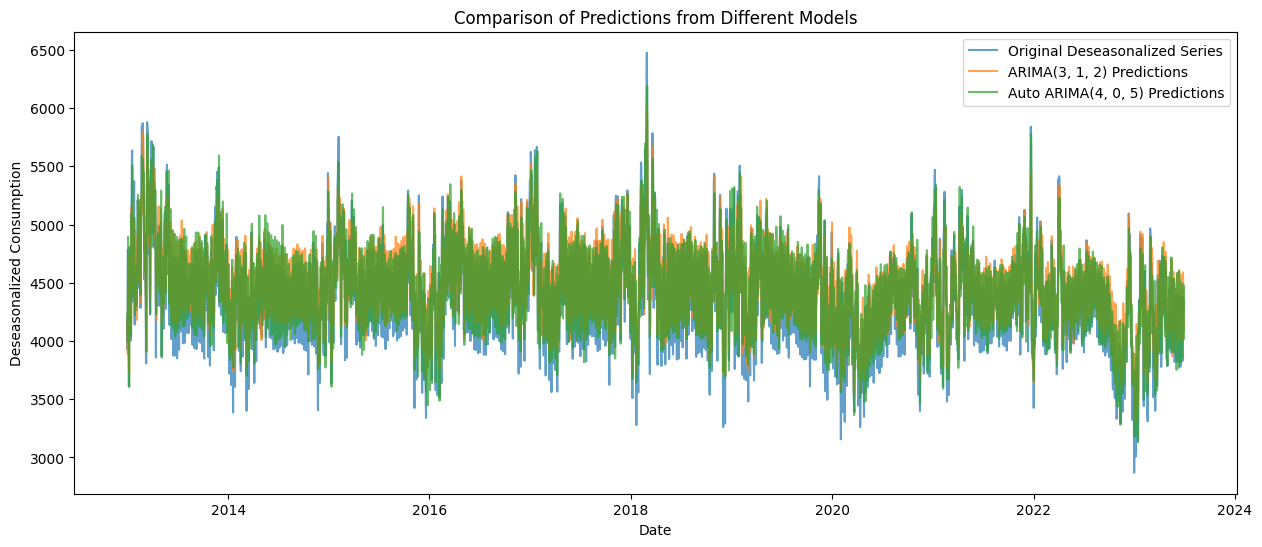

(52834.589716056435, 52166.363319205135)

In [34]:
best_auto_arima_model = ARIMA(deseasonalized_series, order=(4, 0, 5))
best_auto_arima_results = best_auto_arima_model.fit()

auto_arima_predictions = best_auto_arima_results.predict(start=1, end=len(deseasonalized_series))

plt.figure(figsize=(15, 6))
plt.plot(deseasonalized_series, label='Original Deseasonalized Series', alpha=0.7)
plt.plot(predictions, label='ARIMA(3, 1, 2) Predictions', alpha=0.7)
plt.plot(auto_arima_predictions, label='Auto ARIMA(4, 0, 5) Predictions', alpha=0.7)
plt.title('Comparison of Predictions from Different Models')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Consumption')
plt.legend()
plt.show()



#  AIC comparaison

aic_arima_3_1_2 = best_arima_results.aic
aic_auto_arima_4_0_5 = best_auto_arima_results.aic

aic_arima_3_1_2, aic_auto_arima_4_0_5

-  Graphique: Le graphique compare les prédictions des deux modèles (ARIMA(3, 1, 2) et Auto ARIMA(4, 0, 5)) avec la série désaisonnalisée originale. Les prédictions de l'Auto ARIMA semblent suivre de plus près la série originale, indiquant un ajustement potentiellement meilleur.

- AIC:
    AIC pour ARIMA(3, 1, 2) : 52834.5952834.59
    AIC pour Auto ARIMA(4, 0, 5) : 52167.3452167.34

Un AIC plus faible pour le modèle Auto ARIMA suggère également que ce modèle est un meilleur ajustement pour les données.

### Comment pourrait-on ajouter à nouveau la composante saisonnière à partir du résultat obtenu.

In [36]:
common_index = predictions.index.intersection(seasonal_component.index)

seasonal_component_aligned = seasonal_component.loc[common_index]
predictions_aligned = predictions.loc[common_index]

reconstructed_series_arima_3_1_2 = predictions_aligned + seasonal_component_aligned


In [37]:
predictions_aligned.index = predictions_aligned.index.tz_localize(None)
seasonal_component_aligned.index = seasonal_component_aligned.index.tz_localize(None)


Successfully added the seasonal component back to the ARIMA predictions.


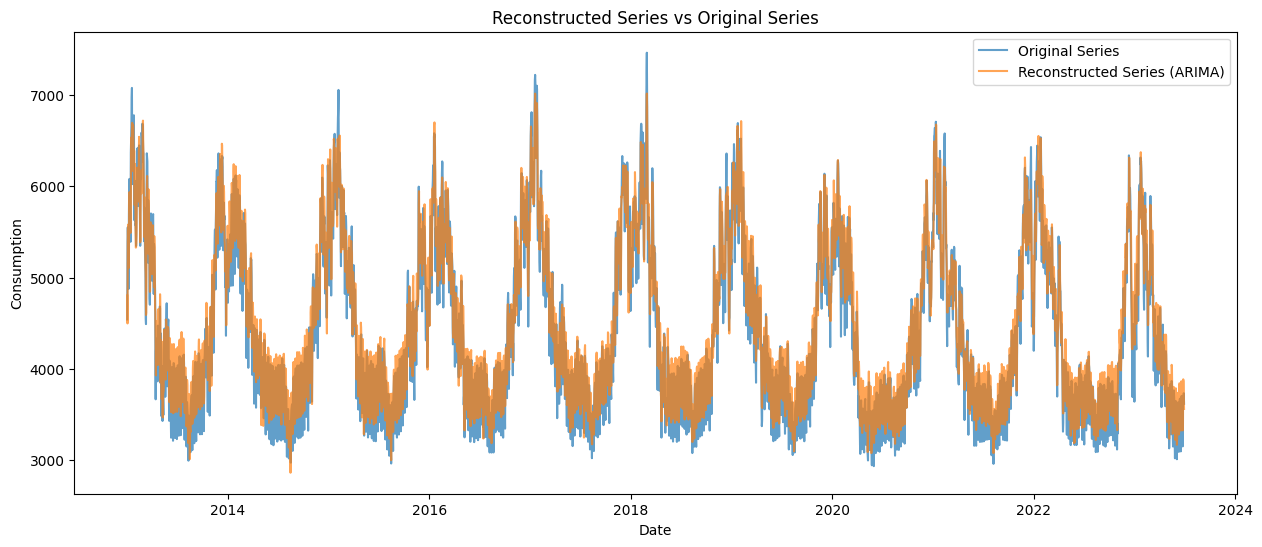

In [39]:
# Plotting the reconstructed series along with the original series for comparison
plt.figure(figsize=(15, 6))
plt.plot(df['consommation_brute_electricite_rte'].loc[common_index], label='Original Series', alpha=0.7)
plt.plot(reconstructed_series_arima_3_1_2, label='Reconstructed Series (ARIMA)', alpha=0.7)
plt.title('Reconstructed Series vs Original Series')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()


Série reconstruite=Preédictions ARIMA+Composante saisonnieére

### Lancez un modèle auto-Arima sur la série originale journalière en incluant les paramètres saisonniers. 

In [ ]:
auto_arima_model_seasonal = auto_arima(df['consommation_brute_electricite_rte'], seasonal=True, m=365, stepwise=True, trace=True)
auto_arima_model_seasonal.summary()

- Temps de calcul élevé: L'utilisation d'un paramètre saisonnier élevé (comme m=365m=365) peut entraîner un temps de calcul très long. L'auto-ARIMA doit ajuster plusieurs modèles pour trouver le meilleur, et cela peut être coûteux en termes de temps et de ressources.



# Approche machine learning avec darts

### Qu’est ce que la métrique MAPE? 

**MAPE (Mean Absolute Percentage Error) est une mesure de précision couramment utilisée pour évaluer la qualité des modèles de prévision en série temporelle. Elle exprime l'erreur en termes de pourcentage, ce qui la rend indépendante de l'échelle des valeurs que vous essayez de prédire.**
- facile à comprendre et à interpréter, car elle donne une mesure de l'erreur en pourcentage.
- ne peut être utilisée que lorsque les valeurs observées AtAt​ sont toutes strictement supérieures à zéro, car elle implique une division par AtAt​.
- tendance à pénaliser davantage les erreurs de prévision lorsque les valeurs observées sont faibles, car ces erreurs auront un plus grand impact en termes de pourcentage.

### Quel est la particularité des train test split quand on travaille avec des séries temporelles?

**Ordre Temporel**
- L'ordre des observations est crucial dans une série temporelle. Contrairement aux méthodes traditionnelles où les données peuvent être mélangées aléatoirement avant le découpage, dans le cas des séries temporelles, ce mélange aléatoire peut détruire l'ordre temporel et la structure saisonnière, ce qui est vital pour les prédictions.

**Pas de Mélange Aléatoire**

- Dans le cas des séries temporelles, les données sont généralement divisées en fonction d'un certain point dans le temps. Par exemple, si vous avez des données quotidiennes pour une année, vous pourriez entraîner le modèle sur les données des 11 premiers mois et tester sur les données du dernier mois. Il n'y a pas de mélange aléatoire des données.

**Risque de Fuite de Données**

- Si les données sont mélangées aléatoirement avant le découpage, cela peut entraîner une fuite de données où l'ensemble d'entraînement contient des informations provenant de l'avenir. Ceci est particulièrement problématique pour les séries temporelles où l'ordre et la temporalité sont importants.

**Saisonnalité et Tendance**
- Il est également important de s'assurer que les ensembles d'entraînement et de test ont des caractéristiques similaires. Par exemple, si la série temporelle a une saisonnalité annuelle, il serait inapproprié de former le modèle sur des données d'été et de le tester sur des données d'hiver.

**Fenêtrage**

- Pour les séries temporelles, une technique appelée "fenêtrage" ou "rolling forecast origin" est souvent utilisée. Dans cette approche, le modèle est formé sur une fenêtre initiale des données, puis cette fenêtre est progressivement étendue pour inclure des points de données plus récents, simulant ainsi une utilisation réelle du modèle.

### Comment peut-on faire une cross validation avec des séries temporelles?

**Walk-Forward Validation ou Rolling-Forecast Origin**

- Initialiser : Choisissez une taille pour la fenêtre d'entraînement et une taille pour la fenêtre de test (généralement 1 pour les prévisions à un pas).
- Rouler : Faites glisser la fenêtre d'entraînement d'une unité de temps, ajoutez cette observation à la fenêtre de test, et répétez le processus.
- Prévoir et Évaluer : À chaque étape, le modèle est ajusté sur la fenêtre d'entraînement et les prévisions sont faites pour la fenêtre de test. Les erreurs de prévision sont collectées à chaque itération pour résumer la compétence du modèle.

**Time Series K-Fold Cross Validation**

- Diviser : La série temporelle est divisée en kk ensembles de données consécutifs.
- Itérer : Pour chaque ensemble unique kk, on utilise k−1k−1 ensembles pour entraîner le modèle et le dernier ensemble pour le tester.
- Prévoir et Évaluer : Les erreurs sont enregistrées pour chaque kk.

**Leave-One-Out Cross Validation (LOOCV)**

- C'est une variante de la validation croisée "Walk-Forward", mais où seulement la dernière donnée est utilisée pour le test à chaque itération. C'est très coûteux en termes de temps et généralement pas recommandé pour les grandes séries temporelles.
**Leave-P-Out Cross Validation**

- Semblable à LOOCV, mais au lieu d'utiliser un seul point de données pour le test, on utilise pp points de données.

**Validation croisée en blocs**

- Dans cette méthode, on divise la série temporelle en plusieurs blocs de données consécutives et on utilise ces blocs pour l'entraînement et le test. C'est moins courant que les autres méthodes mais peut être utile pour les séries temporelles à haute fréquence.

### A l’aide de Darts,  
◦ lancez un premier modèle de Naive Drift sur la série désaisonnalisée en réalisant un train test split (en gardant les deux dernières années en test) et en évaluant sur la MAPE.

In [63]:
import statsmodels.api as sm
from darts import TimeSeries
from darts.models import NaiveDrift
from darts.metrics import rmse, mae


df = pd.read_csv('data/hdf_journalier.csv', parse_dates=['date_heure'])
decomposition = sm.tsa.seasonal_decompose(df['consommation_brute_electricite_rte'], model='additive', period=365)

deseasonalized = decomposition.trend + decomposition.resid
deseasonalized.dropna(inplace=True)  

deseasonalized_series = TimeSeries.from_series(deseasonalized)
train, test = deseasonalized_series[:-730], deseasonalized_series[-730:]

model = NaiveDrift()
model.fit(train)

forecast = model.predict(len(test))
model_mape = mape(forecast, test)

print('MAPE: ', mape(forecast, test))


MAPE:  12.207484479230772


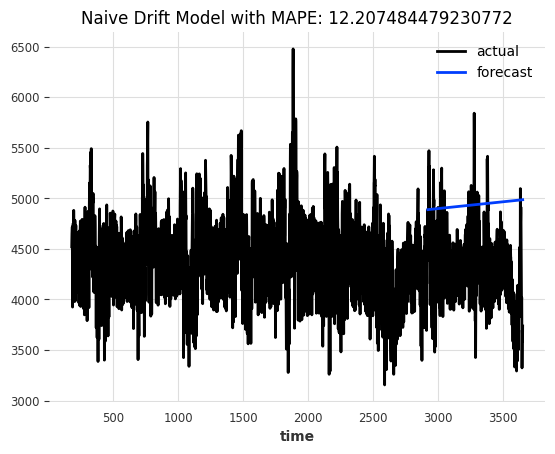

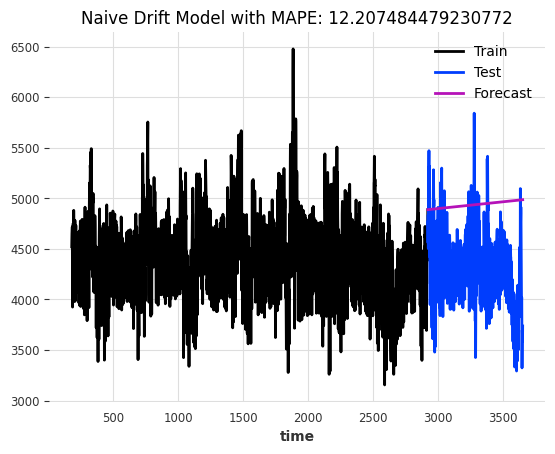

In [64]:
deseasonalized_series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend()
plt.title(f'Naive Drift Model with MAPE: {model_mape}')
plt.show()

train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast')
plt.legend()
plt.title(f'Naive Drift Model with MAPE: {model_mape}')
plt.show()

### Faites la même chose à l’aide d’un Naive seasonal sur la série resample by day.
- Pourquoi pour cette série il n’est pas pratique d’utiliser le MAPE? 
- Quelle autre métrique choisir 

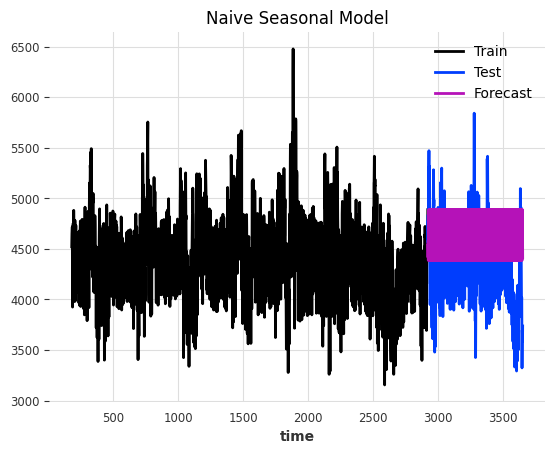

RMSE: 433.640947000754
MAE: 340.9245387757381


In [65]:
from darts.models import NaiveSeasonal

model_seasonal = NaiveSeasonal(K=7)
model_seasonal.fit(train)

forecast_seasonal = model_seasonal.predict(len(test))

train.plot(label='Train')
test.plot(label='Test')
forecast_seasonal.plot(label='Forecast')
plt.legend()
plt.title('Naive Seasonal Model')
plt.show()


print('RMSE:', rmse(forecast_seasonal, test))
print('MAE:', mae(forecast_seasonal, test))


### Comparez les deux modèles créés précédemment (ARIMA manuel/ Auto Arima sur la série désaisonnalisée) en vous servant de darts et en utilisant la métrique MAPE.